# Proyek Analisis Data: E-Commerce Public
- **Nama:** Dely Rafael Sefriansya
- **Email:** delyrafael09@gmail.com, m012d4ky1519@bangkit.academy
- **ID Dicoding:** delyrafael

## Menentukan Pertanyaan Bisnis

- Apakah ada korelasi antara rating pelanggan dengan barang yang banyak terjual?
- Berapa jumlah pelanggan terbanyak berdasarkan kota pelanggan?

## Import Semua Packages/Library yang Digunakan

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

## Data Wrangling

### Gathering Data

In [48]:
CustomersDf = pd.read_csv('/content/customers_dataset.csv')
CustomersDf.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [49]:
GeoDf = pd.read_csv('/content/geolocation_dataset.csv')
GeoDf.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [50]:
OrderItemDf = pd.read_csv('/content/order_items_dataset.csv')
OrderItemDf

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [51]:
OrderPayDf = pd.read_csv('/content/order_payments_dataset.csv')
OrderPayDf.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [52]:
OrderRevDf = pd.read_csv('/content/order_reviews_dataset.csv')
OrderRevDf.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [53]:
OrdersDf = pd.read_csv('/content/orders_dataset.csv')
OrdersDf.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [54]:
ProductCatDf = pd.read_csv('/content/product_category_name_translation.csv')
ProductCatDf

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [55]:
ProductsDf = pd.read_csv('/content/products_dataset.csv')
ProductsDf.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [56]:
SellersDf = pd.read_csv('/content/sellers_dataset.csv')
SellersDf.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

Mencari Informasi dari setiap dataset untuk dilakuakn cleaning

In [57]:
CustomersDf.info()
GeoDf.info()
OrderItemDf.info()
OrderPayDf.info()
OrderRevDf.info()
OrdersDf.info()
ProductCatDf.info()
ProductsDf.info()
SellersDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  

Mencari row yang berisi NaN agar dapat dilakukan penagnanan yang tepat

In [58]:
print('\nCustomers \n',CustomersDf.isna().sum())
print('\nGeolocation \n',GeoDf.isna().sum())
print('\nOrder Item \n',OrderItemDf.isna().sum())
print('\nOrder Payments \n',OrderPayDf.isna().sum())
print('\nOrder Review \n',OrderRevDf.isna().sum())
print('\nOrders \n',OrdersDf.isna().sum())
print('\nProduct Category \n',ProductCatDf.isna().sum())
print('\nProduct \n',ProductsDf.isna().sum())
print('\nSellers \n',SellersDf.isna().sum())


Customers 
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Geolocation 
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Order Item 
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Order Payments 
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Order Review 
 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Orders 

Menampilkan rows yang memiliki NaN

In [59]:
print('\nCustomers \n',CustomersDf[CustomersDf.customer_unique_id.isna()])
print('\nGeolocation \n',GeoDf[GeoDf.geolocation_lng.isna()])
print('\nOrder Item \n',OrderItemDf[OrderItemDf.seller_id.isna()])
print('\nOrder Review \n',OrderRevDf[OrderRevDf.review_comment_title.isna()])
print('\nOrders \n',OrdersDf[OrdersDf.order_approved_at.isna()])
print('\nProduct \n',ProductsDf[ProductsDf.product_category_name.isna()])


Customers 
 Empty DataFrame
Columns: [customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state]
Index: []

Geolocation 
 Empty DataFrame
Columns: [geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state]
Index: []

Order Item 
 Empty DataFrame
Columns: [order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value]
Index: []

Order Review 
                               review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99219  574ed12

Mendesripsikan dataset untuk mengetahui gap data yang tidak normal dalam dataset

In [60]:
print(CustomersDf.describe(),'\n')
print(GeoDf.describe(),'\n')
print(OrderItemDf.describe(),'\n')
print(OrderPayDf.describe(),'\n')
print(OrderRevDf.describe(),'\n')
print(OrdersDf.describe(),'\n')
print(ProductCatDf.describe(),'\n')
print(ProductsDf.describe(),'\n')
print(SellersDf.describe(),'\n')

       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000 

       geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 1.000163e+06     1.000163e+06     1.000163e+06
mean                  3.657417e+04    -2.117615e+01    -4.639054e+01
std                   3.054934e+04     5.715866e+00     4.269748e+00
min                   1.001000e+03    -3.660537e+01    -1.014668e+02
25%                   1.107500e+04    -2.360355e+01    -4.857317e+01
50%                   2.653000e+04    -2.291938e+01    -4.663788e+01
75%                   6.350400e+04    -1.997962e+01    -4.376771e+01
max                   9.999000e+04     4.506593e+01     1.211054e+02 

       order_item_id          price  freight_value
count  112650.000000  112650.000000 

Mencari missing value pada setiap dataset

In [61]:
print('Jumlah data null customers:\n', CustomersDf.isnull().sum(),'\n')
print('Jumlah data null geolocation:\n', GeoDf.isnull().sum(),'\n')
print('Jumlah data null order items:\n', OrderItemDf.isnull().sum(),'\n')
print('Jumlah data null order payments:\n', OrderPayDf.isnull().sum(),'\n')
print('Jumlah data null order reviews:\n', OrderRevDf.isnull().sum(),'\n')
print('Jumlah data null orders:\n', OrdersDf.isnull().sum(),'\n')
print('Jumlah data null product category:\n', ProductCatDf.isnull().sum(),'\n')
print('Jumlah data null products:\n', ProductsDf.isnull().sum(),'\n')
print('Jumlah data null sellers:\n', SellersDf.isnull().sum(),'\n')


Jumlah data null customers:
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64 

Jumlah data null geolocation:
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64 

Jumlah data null order items:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 

Jumlah data null order payments:
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64 

Jumlah data null order reviews:
 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     582

Mencari duplicate data pada setiap dataset


In [62]:
print('Jumlah duplicate data customers: ', CustomersDf.duplicated().sum())
print('Jumlah duplicate data geolocation: ', GeoDf.duplicated().sum())
print('Jumlah duplicate data order items: ', OrderItemDf.duplicated().sum())
print('Jumlah duplicate data order payments: ', OrderPayDf.duplicated().sum())
print('Jumlah duplicate data order reviews: ', OrderRevDf.duplicated().sum())
print('Jumlah duplicate data orders: ', OrdersDf.duplicated().sum())
print('Jumlah duplicate data product category: ', ProductCatDf.duplicated().sum())
print('Jumlah duplicate data products: ', ProductsDf.duplicated().sum())
print('Jumlah duplicate data sellers: ', SellersDf.duplicated().sum())

Jumlah duplicate data customers:  0
Jumlah duplicate data geolocation:  261831
Jumlah duplicate data order items:  0
Jumlah duplicate data order payments:  0
Jumlah duplicate data order reviews:  0
Jumlah duplicate data orders:  0
Jumlah duplicate data product category:  0
Jumlah duplicate data products:  0
Jumlah duplicate data sellers:  0


### Cleaning Data

Cleaning dataset order_item

In [63]:
# Drop mising value
CustomersDf.dropna(axis=0, inplace=True)
CustomersDf.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Cleaning dataset geolocation

In [64]:
# Mendrop data duplicate pada dataset geolocation_dataset
GeoDf.drop_duplicates(inplace=True)
print('Jumlah duplicate data geolocation: ', GeoDf.duplicated().sum())

Jumlah duplicate data geolocation:  0


Cleaning dataset order_item

In [65]:
# Mendrop baris yang memiliki Missing Value
OrderItemDf.dropna(axis=0, inplace=True)
OrderItemDf.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [66]:
# Mengubah kolom type shipping_limit_date menjadi datetime
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  OrderItemDf[column] = pd.to_datetime(OrderItemDf[column])

OrderItemDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


Cleaning dataset Review

In [67]:
# Mengisi missing value pada setiap rows
OrderRevDf["review_comment_title"].fillna("No Title", inplace=True)
OrderRevDf["review_comment_message"].fillna("No Message", inplace=True)

In [68]:
# Mengecek missing value
OrderRevDf.dropna(axis=0, inplace=True)
OrderRevDf.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

Menghitung item yang terjual pada kolom order_item_id

In [69]:
#  Mengelompokkan berdasarkan order_id dan product_id, lalu mengambil nilai terbesar dari order_item_id
dfCountItem = OrderItemDf.groupby(['order_id', 'product_id','price'])['order_item_id'].max().reset_index()

# menghitung price
dfCountItem['total_price'] = dfCountItem[['price', 'order_item_id']].apply(lambda x: x[0] * x[1], axis=1)
dfCountItem = dfCountItem.rename(columns={'order_item_id': 'quantity'})
sortOrderItem = dfCountItem.sort_values(by="quantity",ascending=False)




sortOrderItem

,order_id,product_id,price,quantity,total_price
52029,8272b63d03f5f79c56e9e4120aec44ef,79ce45dbc2ea29b22b5a261bbb7b7ee7,7.80,21,163.80
10850,1b15974a0141d54e36626dca3fdc731a,ee3d532c8a438679776d222e997606b3,100.00,20,2000.00
68186,ab14fdcfbe524636d65ee38360e22ce8,9571759451b1d780ee7c15012ea109d4,98.70,20,1974.00
52028,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,1.20,20,24.00
63242,9ef13efd6949e4573a18964dd1bbe7f5,37eb69aca8718e843d897aa7b82f462d,51.00,15,765.00
...,...,...,...,...,...
36040,5a42d01f5fdf7a96312618390f361e72,4fa33915031a8cde03dd0d3e8fb27f01,144.00,1,144.00
36038,5a42abf0eee65d3a1e361aa49561a521,c804537dd3a8ff5f94d3ee384eccfb98,19.90,1,19.90
36035,5a41aefdf8010bbd69a5264f69213b73,3af6d5f9fdb78f106c003ce49d7f0186,32.90,1,32.90
36033,5a40a4c413dcda147caa00259a1732de,51250f90d798d377a1928e8a4e2e9ae1,13.99,1,13.99


Mengganti nama Product yang awal nya menggunakna bahasa brazil ke bahasa inggris

In [70]:
# Menggabungkan 2 dataset menggunakan inner join
ProductEngDf = pd.merge(ProductsDf, ProductCatDf, on="product_category_name", how="inner")
# Mengganti kolom nama_product dengan nama_translate
ProductEngDf["product_category_name"] = ProductEngDf["product_category_name_english"]

# Hapus kolom nama_translate
ProductEngDf.drop(columns=["product_category_name_english"], inplace=True)
ProductEngDf

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumery,39.0,346.0,2.0,400.0,27.0,5.0,20.0
2,0d009643171aee696f4733340bc2fdd0,perfumery,52.0,150.0,1.0,422.0,21.0,16.0,18.0
3,b1eae565a61935e0011ee7682fef9dc9,perfumery,49.0,460.0,2.0,267.0,17.0,13.0,17.0
4,8da90b37f0fb171b4877c124f965b1f6,perfumery,56.0,733.0,3.0,377.0,18.0,13.0,15.0
...,...,...,...,...,...,...,...,...,...
32323,13b25797ad1e6d6c7cd3cbeb35f8ee7a,furniture_mattress_and_upholstery,44.0,348.0,1.0,18250.0,25.0,25.0,25.0
32324,dc36a7859b743d8610a2bbbaea26ece9,furniture_mattress_and_upholstery,29.0,2073.0,2.0,2500.0,41.0,21.0,21.0
32325,107fde0930956120d1e13dd1062fbb46,furniture_mattress_and_upholstery,51.0,418.0,1.0,30000.0,60.0,73.0,60.0
32326,726b4e18f00255e2e63491bcba3f60b8,furniture_mattress_and_upholstery,41.0,866.0,1.0,1700.0,70.0,10.0,100.0


## Exploratory Data Analysis (EDA)

### Explore customer_dataset

In [71]:
CustomersDf.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
91043,f931c8fa3b77e237d987ed836394804d,1ea38599e1e6f0c11fc2c9675e20d103,32110,contagem,MG
64881,66a3f3356033193e40383a4f9888934d,3157466613dad6ff9a7a98af3ba288f2,6756,taboao da serra,SP
95750,fb20d746de8b6784ad3a0b665c457c17,a23c501587d77f83f65fc18639c811fe,16015,aracatuba,SP
86016,10054c55fa5243fc0c2298e46d9e1a30,752aa35e7c6931b1a551a99f04458686,71670,brasilia,DF
33186,562cc394f31d218035fccb7d2aa8d0dd,2b67c0451900431bdf0e64019be7bf05,9540,sao caetano do sul,SP


In [72]:
CustomersDf.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

### Explore sellers_dataset

In [73]:
SellersDf.sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
2220,db2956745b3a8e9f3785c99f34b5d25e,11600,sao sebastiao,SP
560,164a5a8794e6d42e14f55e447b12a3bc,85980,guaira,PR
184,aaed1309374718fdd995ee4c58c9dfcd,89120,timbo,SC
1424,5db42a6cd9bf1bf0d3aab9582767f168,29010,vitoria,ES
819,febab0275244b9a49a623f0bd613ca2f,13920,pedreira,SP


### Menggabung semua dataset yang diperlukan untuk dianalisis

In [74]:
merge1 = pd.merge(
    left = CustomersDf,
    right = OrdersDf,
    on = "customer_id",
)
merge1.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [75]:
merge2 = pd.merge(
    left = merge1,
    right = OrderPayDf,
    how = 'left',
    left_on = 'order_id',
    right_on ='order_id'
)
merge2.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,credit_card,2.0,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1.0,credit_card,8.0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,credit_card,7.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,credit_card,1.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1.0,credit_card,8.0,252.25


In [76]:
merge3 = pd.merge(
    left = merge2,
    right = dfCountItem,
    how = 'left',
    left_on = 'order_id',
    right_on ='order_id'
)
merge3.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,product_id,price,quantity,total_price
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,credit_card,2.0,146.87,a9516a079e37a9c9c36b9b78b10169e8,124.99,1.0,124.99
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1.0,credit_card,8.0,335.48,4aa6014eceb682077f9dc4bffebc05b0,289.00,1.0,289.00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,credit_card,7.0,157.73,bd07b66896d6f1494f5b86251848ced7,139.94,1.0,139.94
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,credit_card,1.0,173.30,a5647c44af977b148e0a3a4751a09e2e,149.94,1.0,149.94
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1.0,credit_card,8.0,252.25,9391a573abe00141c56e38d84d7d5b3b,230.00,1.0,230.00


In [77]:
merge4 = pd.merge(
    left = merge3,
    right = ProductEngDf,
    how = 'left',
    left_on = 'product_id',
    right_on ='product_id'
)
merge3.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,product_id,price,quantity,total_price
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,credit_card,2.0,146.87,a9516a079e37a9c9c36b9b78b10169e8,124.99,1.0,124.99
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1.0,credit_card,8.0,335.48,4aa6014eceb682077f9dc4bffebc05b0,289.00,1.0,289.00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,credit_card,7.0,157.73,bd07b66896d6f1494f5b86251848ced7,139.94,1.0,139.94
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,credit_card,1.0,173.30,a5647c44af977b148e0a3a4751a09e2e,149.94,1.0,149.94
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1.0,credit_card,8.0,252.25,9391a573abe00141c56e38d84d7d5b3b,230.00,1.0,230.00


In [78]:
groupDf=pd.merge(
    left=merge4,
    right=OrderRevDf,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
groupDf

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,8683.0,54.0,64.0,31.0,88b8b52d46df026a9d1ad2136a59b30b,4.0,No Title,No Message,2017-05-26 00:00:00,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,10150.0,89.0,15.0,40.0,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,No Title,No Message,2018-01-30 00:00:00,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,8267.0,52.0,52.0,17.0,5ad6695d76ee186dc473c42706984d87,5.0,No Title,No Message,2018-06-15 00:00:00,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,12160.0,56.0,51.0,28.0,059a801bb31f6aab2266e672cab87bc5,5.0,No Title,No Message,2018-03-29 00:00:00,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,5200.0,45.0,15.0,35.0,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108497,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,...,611.0,22.0,22.0,23.0,36e2cdbaa9f639b57c53b37ac798fee8,4.0,Recomendo,No Message,2018-04-14 00:00:00,2018-04-28 11:15:04
108498,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,...,1211.0,25.0,24.0,22.0,b273b431c3aedb4eed18643309652940,5.0,No Title,No Message,2018-04-12 00:00:00,2018-04-16 10:36:05
108499,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,...,870.0,25.0,20.0,18.0,fa4f16891e6b2edd1354668d07f5648b,1.0,Chateada,Esperava qualidade no atendimento e estou tend...,2018-05-04 00:00:00,2018-05-08 01:41:07
108500,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,...,710.0,19.0,13.0,14.0,0bcdc9e450ea500811a8d39ee993cd47,5.0,No Title,No Message,2017-11-17 00:00:00,2017-11-19 23:34:18


In [79]:
groupDf.columns.tolist()

['customer_id',
 'customer_unique_id',
 'customer_zip_code_prefix',
 'customer_city',
 'customer_state',
 'order_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'payment_sequential',
 'payment_type',
 'payment_installments',
 'payment_value',
 'product_id',
 'price',
 'quantity',
 'total_price',
 'product_category_name',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'review_id',
 'review_score',
 'review_comment_title',
 'review_comment_message',
 'review_creation_date',
 'review_answer_timestamp']

### RFM


In [80]:
# Hitung nilai R
groupDf['recency'] = (pd.to_datetime('2022-04-01') - pd.to_datetime(groupDf['order_purchase_timestamp'])).dt.days

# Hitung nilai F
frequency = groupDf.groupby('customer_id')['order_purchase_timestamp'].count()
groupDf = groupDf.merge(frequency, on='customer_id', suffixes=('', '_count'))
groupDf.rename(columns={'order_purchase_timestamp_count': 'frequency'}, inplace=True)

# Hitung nilai M
monetary = groupDf.groupby('customer_id')['payment_value'].sum()
groupDf = groupDf.merge(monetary, on='customer_id', suffixes=('', '_sum'))
groupDf.rename(columns={'payment_value_sum': 'monetary'}, inplace=True)

# Tampilkan hasil
groupDf[['customer_id', 'recency', 'frequency', 'monetary']]


,customer_id,recency,frequency,monetary
0,06b8999e2fba1a1fbc88172c00ba8bc7,1780,1,146.87
1,18955e83d337fd6b2def6b18a428ac77,1539,1,335.48
2,4e7b3e00288586ebd08712fdd0374a03,1412,1,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,1479,1,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,1341,1,252.25
...,...,...,...,...
108497,17ddf5dd5d51696bb3d7c6291687be6f,1454,1,88.78
108498,e7b71a9017aa05c9a7fd292d714858e8,1457,1,129.06
108499,5e28dfe12db7fb50a4b2f691faecea5e,1453,1,56.04
108500,56b18e2166679b8a959d72dd06da27f9,1609,1,711.07


In [81]:
groupDf.to_csv('E-commerce_clean_data_RFM.csv', index=False)

In [92]:
deleteCol = ['customer_unique_id','customer_zip_code_prefix', 'order_approved_at','order_delivered_carrier_date', 'order_delivered_customer_date',
               'order_estimated_delivery_date', 'payment_type','payment_sequential','payment_installments','review_comment_title','review_comment_message',
               'review_creation_date','review_answer_timestamp','price','product_description_lenght','product_photos_qty','product_weight_g',
               'product_length_cm','product_height_cm','product_width_cm']

df = groupDf.drop(columns=deleteCol)
df.to_csv('main_data.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1:  Apakah ada korelasi antara rating pelanggan dengan barang yang banyak terjual?

In [83]:
ratingCus =groupDf['review_score'].value_counts().sort_values(ascending=False)
hightScore = ratingCus.idxmax()

In [84]:
ratingCus

5.0    61452
4.0    20534
1.0    13061
3.0     8958
2.0     3647
Name: review_score, dtype: int64

In [85]:
from matplotlib.text import Annotation

<ipython-input-86-e2b32bedff08>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("Blues")


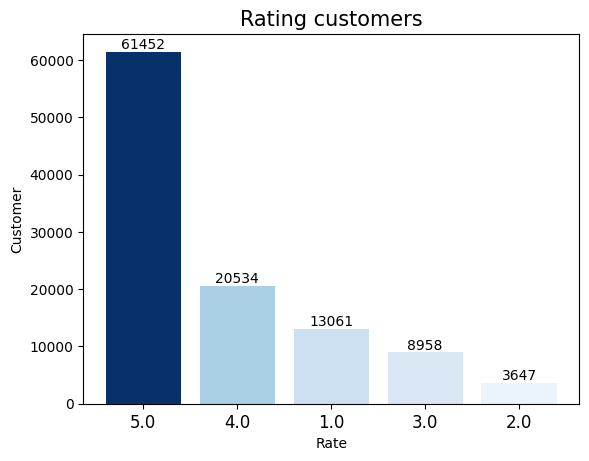

In [86]:
cmap = cm.get_cmap("Blues")

# Plot bar chart dengan warna yang berbeda untuk nilai tertinggi
plt.bar(range(1, len(ratingCus.values) + 1), ratingCus.values, color=cmap(ratingCus.values / max(ratingCus.values)))

# Menambahkan nilai pada setiap bar
for i in range(len(ratingCus.values)):
    plt.text(i + 1, ratingCus.values[i], str(ratingCus.values[i]), ha='center', va='bottom')

# Mengganti label sumbu x
plt.xticks(range(1, len(ratingCus.index) + 1), ratingCus.index)

plt.title("Rating customers", fontsize=15)
plt.xlabel("Rate")
plt.ylabel("Customer")
plt.xticks(fontsize=12)
plt.show()


In [87]:
groupDf.groupby(by=['product_category_name','quantity']).agg({
        'review_score':'mean',

}).sort_values(by='quantity', ascending=False)

review_score
product_category_name      quantity              
health_beauty              21.0          1.000000
                           20.0          1.000000
auto                       20.0               NaN
computers_accessories      20.0          1.000000
garden_tools               15.0          5.000000
...                                           ...
fashion_childrens_clothes  1.0           4.500000
perfumery                  1.0           4.178831
home_confort               1.0           3.994949
party_supplies             1.0           4.342105
agro_industry_and_commerce 1.0           4.104396

[352 rows x 1 columns]

In [88]:
# Menghitung korelasi Pearson
correlation = groupDf['review_score'].corr(groupDf['quantity'])

# Mencetak nilai korelasi
print(f"Nilai Korelasi Pearson: {correlation}")

Nilai Korelasi Pearson: -0.1182422979021447


<ipython-input-89-7e1a312b9030>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = groupDf.corr()


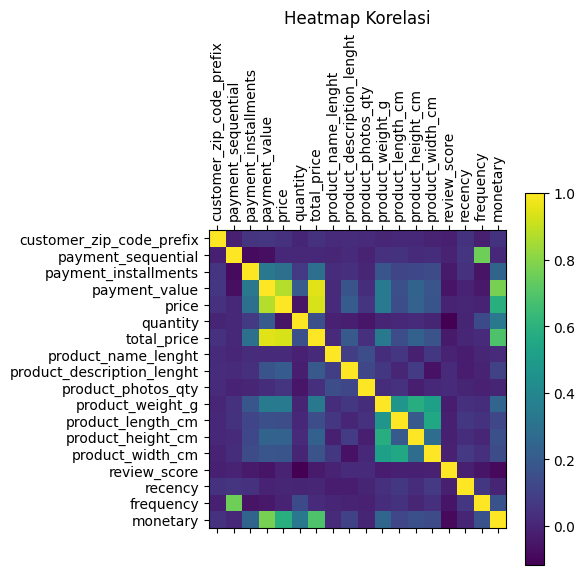

In [89]:
corr = groupDf.corr()
# Menampilkan heatmap korelasi
plt.matshow(corr)
plt.title('Heatmap Korelasi')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.show()

### Pertanyaan 2: Berapa jumlah pelanggan terbanyak berdasarkan kota pelanggan?

In [90]:
groupDf.groupby(by=['customer_city','product_category_name']).agg({
        'quantity':'sum',

}).sort_values(by='quantity', ascending=False)

quantity
customer_city product_category_name          
sao paulo     bed_bath_table           2501.0
              health_beauty            1914.0
              housewares               1523.0
              sports_leisure           1500.0
              furniture_decor          1487.0
...                                       ...
itapecerica   computers_accessories       1.0
              electronics                 1.0
              garden_tools                1.0
              housewares                  1.0
zortea        computers_accessories       1.0

[25199 rows x 1 columns]

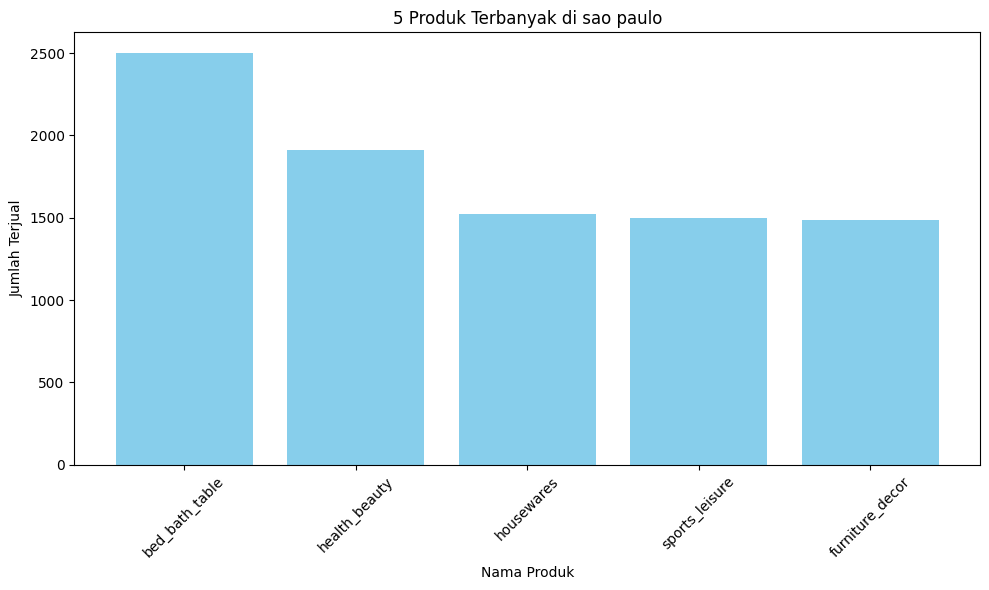

In [91]:
# Ganti 'Nama_Kota' dengan nama kota yang ingin Anda visualisasikan
# selectCity = groupDf['customer_city'].iloc[]
selectCity = 'sao paulo'

# Filter data berdasarkan kota terpilih
filterCity = groupDf.set_index('customer_city').loc[selectCity]

# Mengelompokkan berdasarkan kategori produk dan menghitung total item terjual
top5Product= filterCity.groupby('product_category_name')['quantity'].sum().nlargest(5)

# Membuat plot batang
plt.figure(figsize=(10, 6))
plt.bar(top5Product.index, top5Product.values, color='skyblue')
plt.xlabel('Nama Produk')
plt.ylabel('Jumlah Terjual')
plt.title(f'5 Produk Terbanyak di {selectCity}')
plt.xticks(rotation=45)
plt.tight_layout()

# Tampilkan plot
plt.show()

## Conclusion

- **Apakah ada korelasi antara rating pelanggan dengan barang yang banyak terjual?**
pada menghitung korelasi anatra rating dengan barang yang banyak terjaul didapatkan bahwa tidak ada korelasi anatara keduanya, nilai korelasi kedua nya adalah -0.1182422979021447 dapat diartikan memiliki korelasi lemah negatif sehingga tidak ada korelasinya, dapat diartikan bahwa rating tinggi tidak memastikan barang tersebut banyak terjual  

- **Berapa jumlah pelanggan terbanyak berdasarkan kota pelanggan?**
pada jumlah barang terbanyak terjual pada satu kota adalah kota sao paulo sehingga kita dapat melakukan pemasaran pada kota tersebut pada yang penjualan product terbanyak agar dapat mendapatkan keuntungan.

